# Forbes Richest Athlete Data Analysis.

#### This is the analysis of Forbes Richest Sport men dating from 1990-2020,with their various sports,nationality and earnings in millions with some other specific data on their rankings.

## Import Libraries

In [2]:
## Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [3]:
## Extracting the Data
df = pd.read_csv('Forbes Richest Athlete.csv')

In [4]:
## Viewing the data
df.head() 

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [5]:
df.tail()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5
300,301,Carson Wentz,USA,10,>100,American Football,2020,59.1


In [7]:
df.columns

Index(['S.NO', 'Name', 'Nationality', 'Current Rank', 'Previous Year Rank',
       'Sport', 'Year', 'earnings ($ million)'],
      dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=301, step=1)

In [9]:
df.shape

(301, 8)

In [10]:
df.axes

[RangeIndex(start=0, stop=301, step=1),
 Index(['S.NO', 'Name', 'Nationality', 'Current Rank', 'Previous Year Rank',
        'Sport', 'Year', 'earnings ($ million)'],
       dtype='object')]

## Data Cleaning

In [11]:
df.dtypes

S.NO                      int64
Name                     object
Nationality              object
Current Rank              int64
Previous Year Rank       object
Sport                    object
Year                      int64
earnings ($ million)    float64
dtype: object

In [12]:
df.isnull()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,False,False,False,False,True,False,False,False
1,False,False,False,False,True,False,False,False
2,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,False
4,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...
296,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

In [14]:
### Checking for Inconsistent Data Entry
df['Sport'] = df['Sport'].str.lower()

In [17]:
## Dropping the miising value column cause we dont necessarily need the previous ranking data
df = df.drop(labels='Previous Year Rank',axis=1)

## Data Analysis

In [18]:
df.describe()

,S.NO,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301.000000,301.000000
mean,151.000000,5.448505,2005.122924,45.516279
std,87.035433,2.850995,9.063563,33.525337
min,1.000000,1.000000,1990.000000,8.100000
25%,76.000000,3.000000,1997.000000,24.000000
50%,151.000000,5.000000,2005.000000,39.000000
75%,226.000000,8.000000,2013.000000,59.400000
max,301.000000,10.000000,2020.000000,300.000000


In [19]:
### Getting data of the forbes richest athlete first position.
first_rank = df[(df['Current Rank']== 1)]


In [20]:
first_rank

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,boxing,1990,28.6
10,11,Evander Holyfield,USA,1,boxing,1991,60.5
20,21,Michael Jordan,USA,1,basketball,1992,35.9
30,31,Michael Jordan,USA,1,basketball,1993,36.0
40,41,Michael Jordan,USA,1,basketball,1994,30.0
50,51,Michael Jordan,USA,1,basketball,1995,43.9
60,61,Mike Tyson,USA,1,boxing,1996,75.0
70,71,Michael Jordan,USA,1,basketball,1997,78.3
80,81,Michael Jordan,USA,1,basketball,1998,69.0
90,91,Michael Schumacher,Germany,1,auto racing,1999,49.0


In [30]:
## The summary of the sports which have athletes that are in forbes richest athlete list. 
df['Sport'].describe()


count            301
unique            20
top       basketball
freq              81
Name: Sport, dtype: object

 * The Sport that contains the highest number of athlete in the dataset is Basketball, with 20 unique sports.

In [32]:
## The summary of the sports of athletes that rank first in forbes richest athlete.
first_rank['Sport'].describe()

count       30
unique       6
top       golf
freq        11
Name: Sport, dtype: object

In [31]:
## The summary of the first rank of the forbes richest athlete
first_rank['Nationality'].describe()

count      30
unique      5
top       USA
freq       24
Name: Nationality, dtype: object

In [34]:
## The athlete(first_rank) with most frequency.
first_rank['Name'].max()

'Tiger Woods'

In [35]:
## The nation with most frequency.
df['Nationality'].max()

'USA'

In [36]:
## The nation with the highest first rank frequency.
first_rank['Nationality'].max()

'USA'

In [37]:
## The nation with least frequency.
df['Nationality'].min()

'Argentina'

In [52]:
## The highest earning in millions of an athlete.
df['earnings ($ million)'].max()

300.0

In [40]:
## Forbes richest athletes that play soccer
soccer_list = df[(df['Sport']== 'soccer')]
soccer_list

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
138,139,David Beckham,UK,8,soccer,2004,28.0
147,148,David Beckham,UK,7,soccer,2005,32.5
166,167,David Beckham,UK,6,soccer,2007,33.0
169,170,Ronaldinho,Brazil,9,soccer,2007,31.0
172,173,David Beckham,UK,2,soccer,2008,50.0
178,179,Ronaldinho,Brazil,8,soccer,2008,37.0
185,186,David Beckham,UK,5,soccer,2009,42.0
195,196,David Beckham,UK,5,soccer,2010,43.7
206,207,David Beckham,UK,6,soccer,2011,40.0
207,208,Cristiano Ronaldo,Portugal,7,soccer,2011,38.0


In [51]:
## Summary of forbes richest athlete that play soccer.
soccer_list.describe()

,S.NO,Current Rank,Year,earnings ($ million)
count,33.000000,33.000000,33.000000,33.000000
mean,231.969697,4.909091,2013.606061,67.378788
std,44.459592,2.897883,4.622901,30.292416
min,139.000000,1.000000,2004.000000,28.000000
25%,207.000000,2.000000,2011.000000,41.300000
50%,233.000000,4.000000,2014.000000,64.700000
75%,273.000000,8.000000,2018.000000,93.000000
max,295.000000,10.000000,2020.000000,127.000000


In [41]:
## Forbes richest athletes that are from USA.
usa_list = df[(df['Nationality']=='USA')]
usa_list

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,boxing,1990,28.6
1,2,Buster Douglas,USA,2,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,boxing,1990,13.0
5,6,Jack Nicklaus,USA,6,golf,1990,8.6
7,8,Michael Jordan,USA,8,basketball,1990,8.1
...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,basketball,2020,74.4
297,298,Kevin Durant,USA,7,basketball,2020,63.9
298,299,Tiger Woods,USA,8,golf,2020,62.3
299,300,Kirk Cousins,USA,9,american football,2020,60.5


In [50]:
## Summary of forbes richest athlete from USA.
usa_list.describe()

,S.NO,Current Rank,Year,earnings ($ million)
count,206.000000,206.000000,206.000000,206.000000
mean,139.504854,5.558252,2003.912621,42.651942
std,84.511263,2.866800,8.789802,34.117126
min,1.000000,1.000000,1990.000000,8.100000
25%,69.250000,3.000000,1996.000000,23.000000
50%,129.500000,6.000000,2003.000000,35.700000
75%,205.500000,8.000000,2011.000000,53.000000
max,301.000000,10.000000,2020.000000,300.000000


In [53]:
## Forbes richest athletes that play Basketball
basket_list = df[(df['Sport']=='basketball')]
basket_list

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
7,8,Michael Jordan,USA,8,basketball,1990,8.1
12,13,Michael Jordan,USA,3,basketball,1991,16.0
20,21,Michael Jordan,USA,1,basketball,1992,35.9
30,31,Michael Jordan,USA,1,basketball,1993,36.0
40,41,Michael Jordan,USA,1,basketball,1994,30.0
...,...,...,...,...,...,...,...
289,290,Stephen Curry,USA,9,basketball,2019,79.8
290,291,Kevin Durant,USA,10,basketball,2019,65.4
295,296,LeBron James,USA,5,basketball,2020,88.2
296,297,Stephen Curry,USA,6,basketball,2020,74.4


In [54]:
## Summary of forbes richest athlete that play Basketball.
basket_list.describe()

,S.NO,Current Rank,Year,earnings ($ million)
count,81.000000,81.000000,81.000000,81.000000
mean,159.481481,5.567901,2006.012346,42.198765
std,80.063898,2.640730,8.268152,20.103305
min,8.000000,1.000000,1990.000000,8.100000
25%,100.000000,3.000000,1999.000000,26.100000
50%,149.000000,6.000000,2005.000000,36.000000
75%,225.000000,8.000000,2013.000000,53.000000
max,298.000000,10.000000,2020.000000,89.000000


In [46]:
## Forbes richest athletes owning 50 million dollars.
million_list = df[(df['earnings ($ million)']>=50.0)]
million_list

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
10,11,Evander Holyfield,USA,1,boxing,1991,60.5
60,61,Mike Tyson,USA,1,boxing,1996,75.0
61,62,Michael Jordan,USA,2,basketball,1996,52.6
70,71,Michael Jordan,USA,1,basketball,1997,78.3
71,72,Evander Holyfield,USA,2,boxing,1997,54.3
...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,basketball,2020,74.4
297,298,Kevin Durant,USA,7,basketball,2020,63.9
298,299,Tiger Woods,USA,8,golf,2020,62.3
299,300,Kirk Cousins,USA,9,american football,2020,60.5


In [48]:
## Summary of athletes that earned more than 50 million dollars.
million_list.describe()

,S.NO,Current Rank,Year,earnings ($ million)
count,102.000000,102.000000,102.000000,102.000000
mean,225.852941,3.960784,2013.019608,78.966667
std,66.575558,2.760835,6.671916,36.601989
min,11.000000,1.000000,1991.000000,50.000000
25%,202.250000,2.000000,2011.000000,59.175000
50%,246.500000,3.000000,2015.000000,71.900000
75%,275.750000,6.000000,2018.000000,88.800000
max,301.000000,10.000000,2020.000000,300.000000


## Data Visualization

<AxesSubplot:title={'center':'Athletes who have been forbes richest athlete and their frequency'}, xlabel='Name', ylabel='count'>

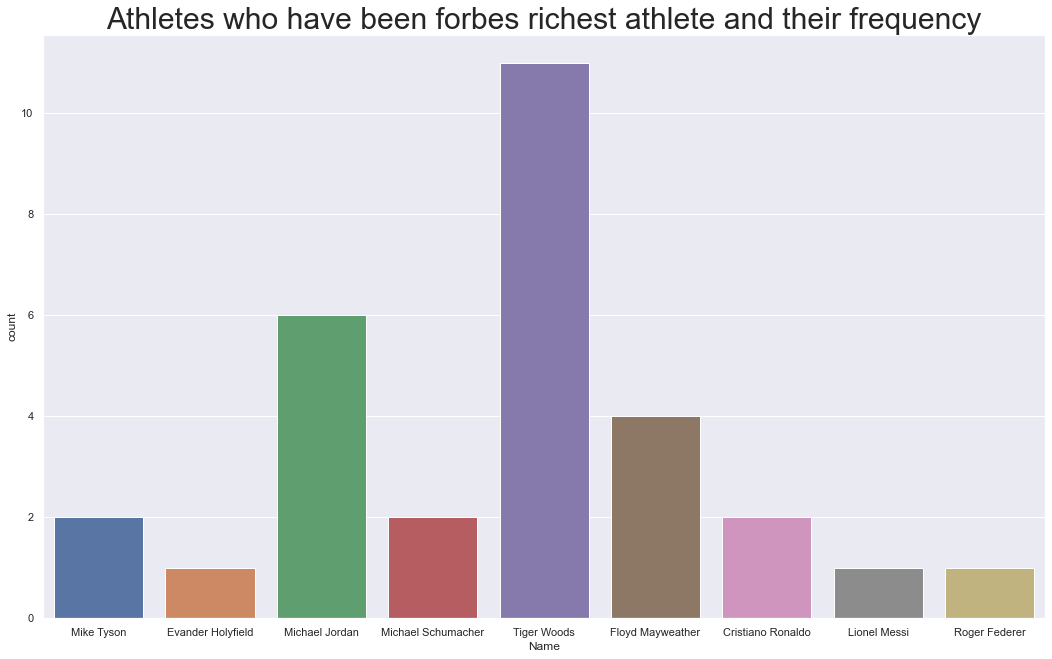

In [58]:
sns.set(rc={'figure.figsize':(16,10)})
plt.title ("Athletes who have been forbes richest athlete and their frequency", fontsize=30)
sns.countplot('Name',data=first_rank)

<AxesSubplot:title={'center':'Sports with its athlete as forbes richest athlete and their frequency'}, xlabel='Sport', ylabel='count'>

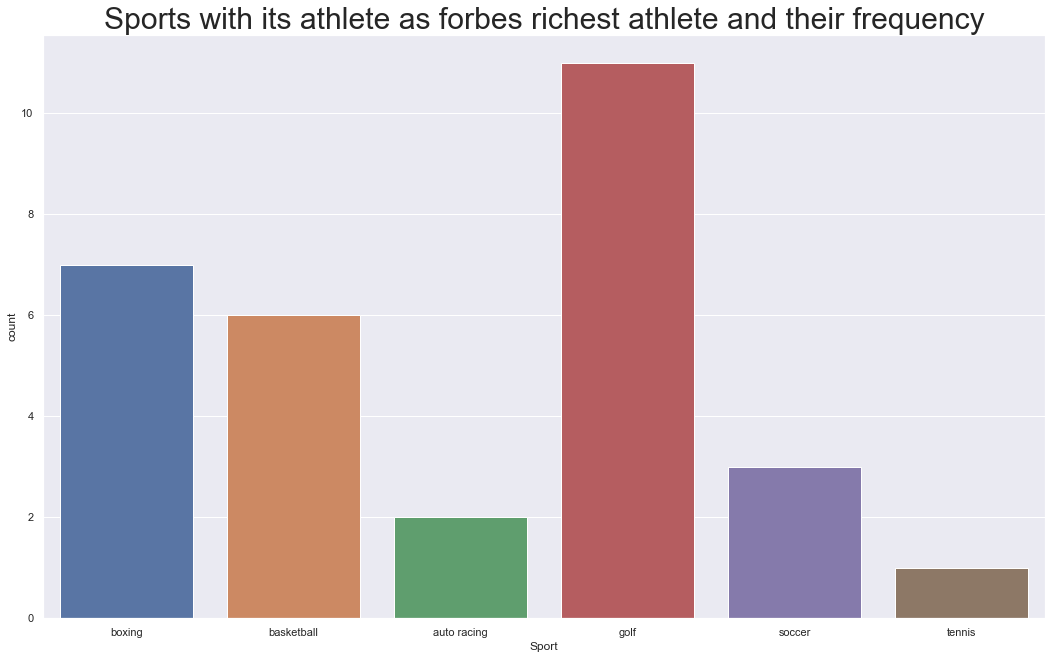

In [60]:
sns.set(rc={'figure.figsize':(16,10)})
plt.title ("Sports with its athlete as forbes richest athlete and their frequency", fontsize=30)
sns.countplot('Sport',data=first_rank)

Text(0, 0.5, 'Frequency')

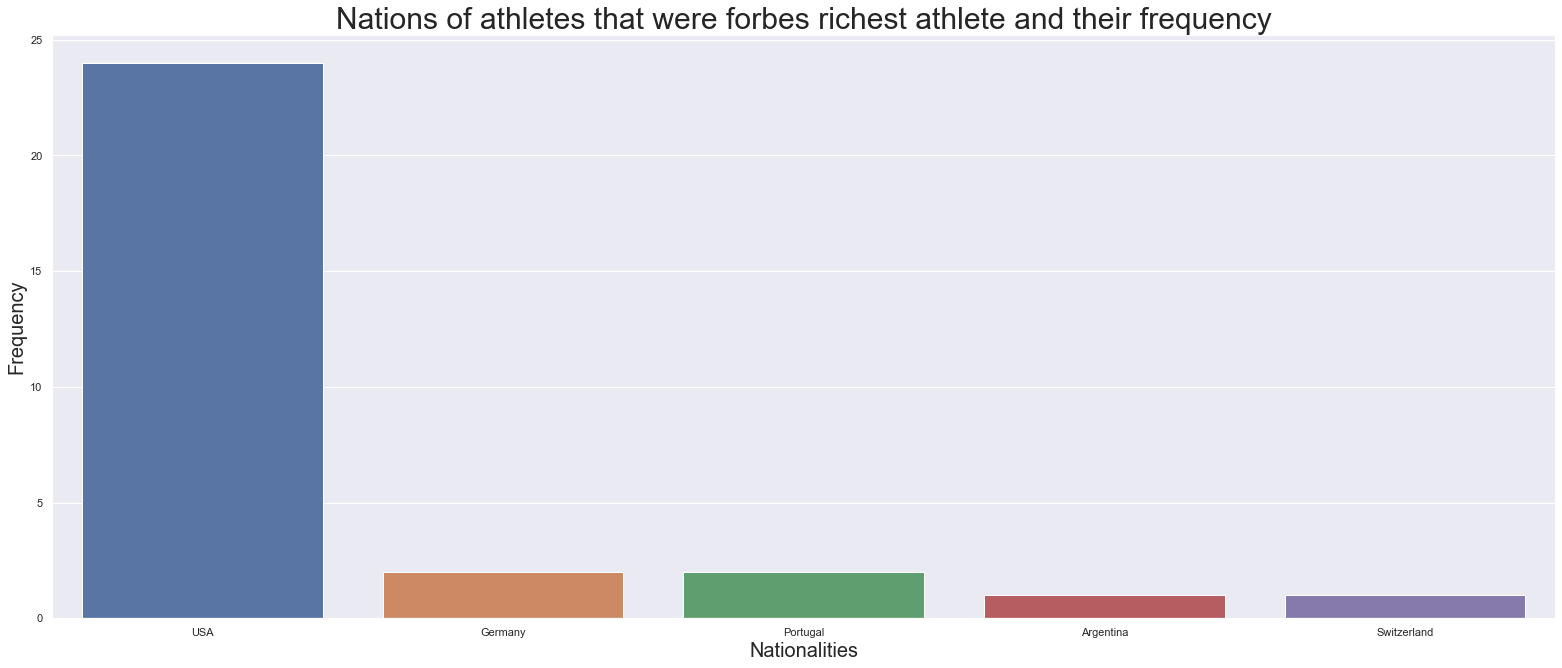

In [66]:
sns.set(rc={'figure.figsize':(24,10)})
plt.title ("Nations of athletes that were forbes richest athlete and their frequency", fontsize=30)
sns.countplot('Nationality',data = first_rank)


Text(0.5, 1.0, 'Forbes Richest Athletes and their earnings')

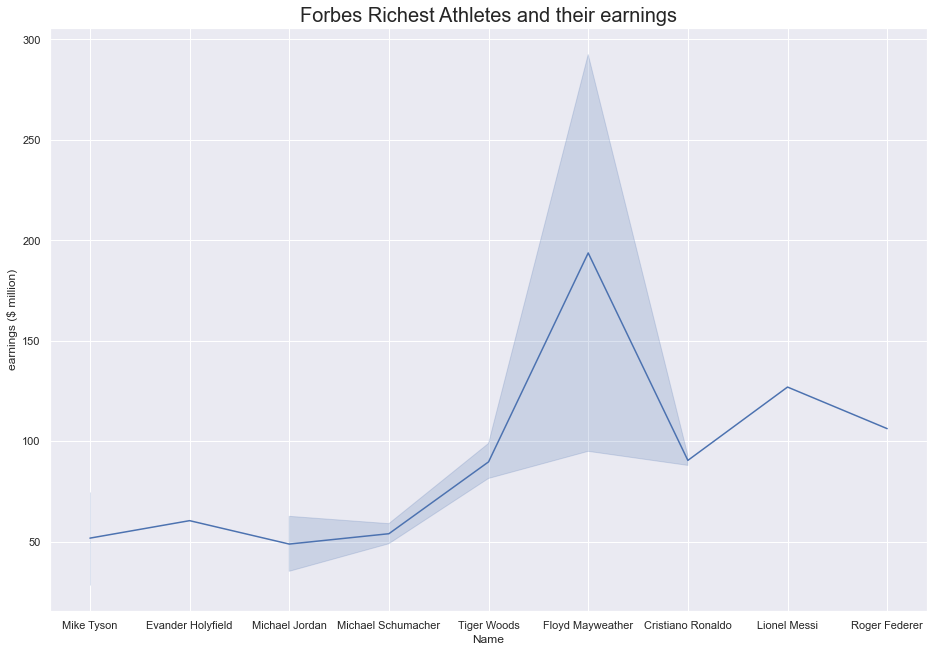

In [73]:
plt.figure(figsize=(14,10))
sns.lineplot(x = 'Name',y = 'earnings ($ million)',data = first_rank).set_title('Forbes Richest Athletes and their earnings',fontsize = 20)

Text(0.5, 1.0, 'Forbes Richest Athletes and their various sports')

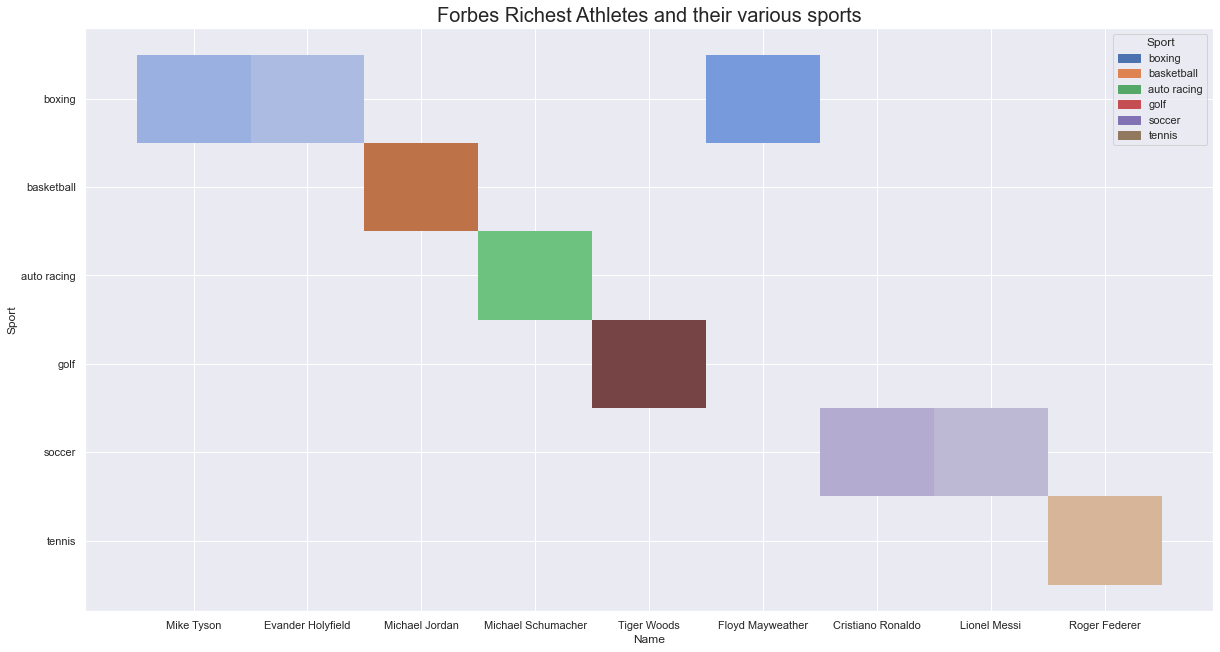

In [77]:
plt.figure(figsize=(18,10))
sns.histplot(x = 'Name',y = 'Sport',data = first_rank,hue='Sport').set_title('Forbes Richest Athletes and their various sports',fontsize = 20)

Text(0.5, 1.0, 'Forbes Richest Athletes and their various sports')

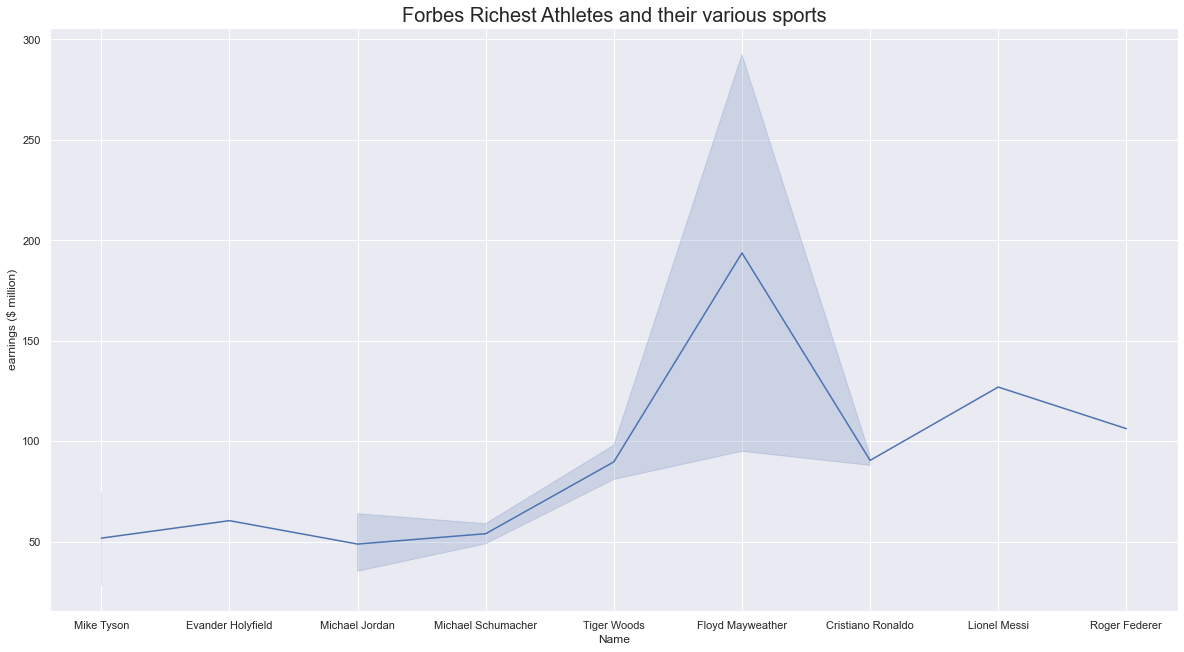

In [81]:
plt.figure(figsize=(18,10))
sns.lineplot(x = 'Name',y='earnings ($ million)',data = first_rank).set_title('Forbes Richest Athletes and their various earnings',fontsize = 20)

Text(0.5, 1.0, 'Forbes Richest Athlete nations and their earnings and their various earnings')

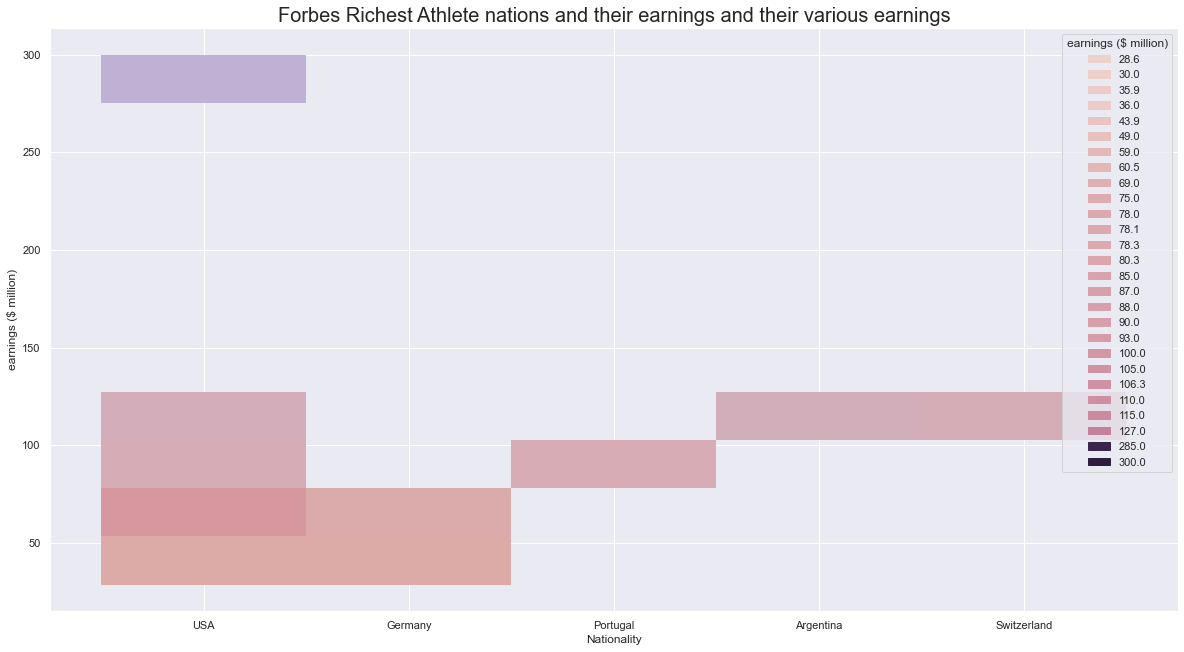

In [89]:
plt.figure(figsize=(18,10))
sns.histplot(x = 'Nationality',y='earnings ($ million)',data = first_rank,hue='earnings ($ million)').set_title('Forbes Richest Athlete nations and their earnings and their various earnings',fontsize = 20)

<AxesSubplot:title={'center':'Basket ball players in forbes richest athlete top 10 from 1990-2020 and their frequency'}, xlabel='Name', ylabel='count'>

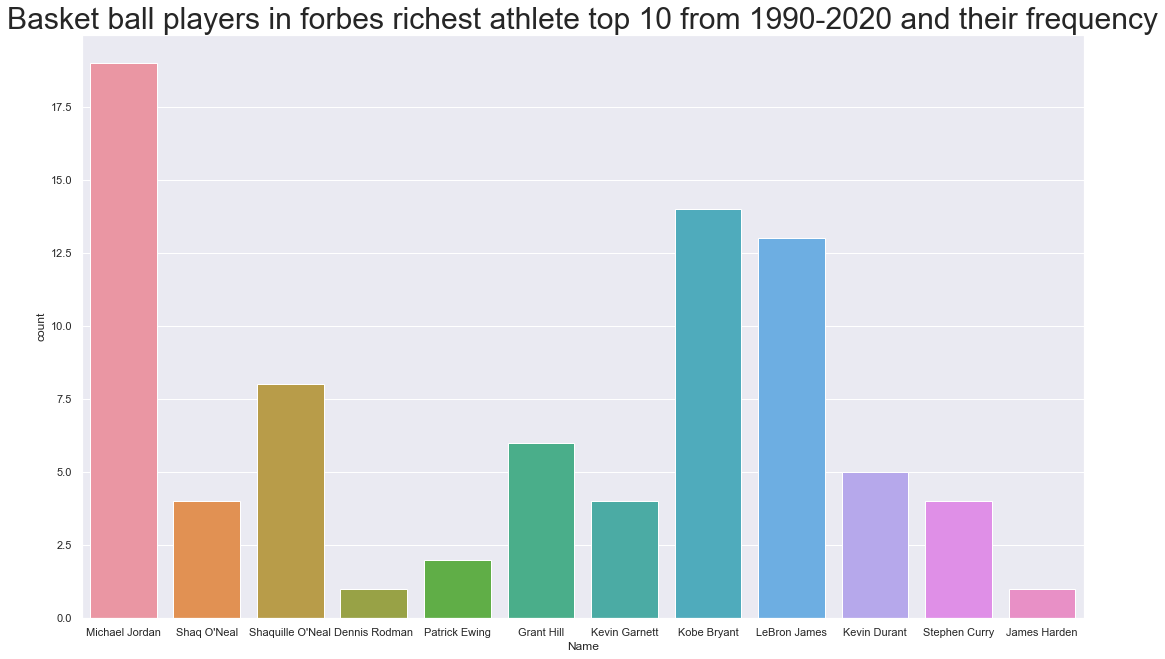

In [91]:
sns.set(rc={'figure.figsize':(16,10)})
plt.title ("Basket ball players in forbes richest athlete top 10 from 1990-2020 and their frequency", fontsize=30)
sns.countplot('Name',data=basket_list)

<AxesSubplot:title={'center':'Soccer players in forbes richest athlete top 10 from 1990-2020 and their frequency'}, xlabel='Name', ylabel='count'>

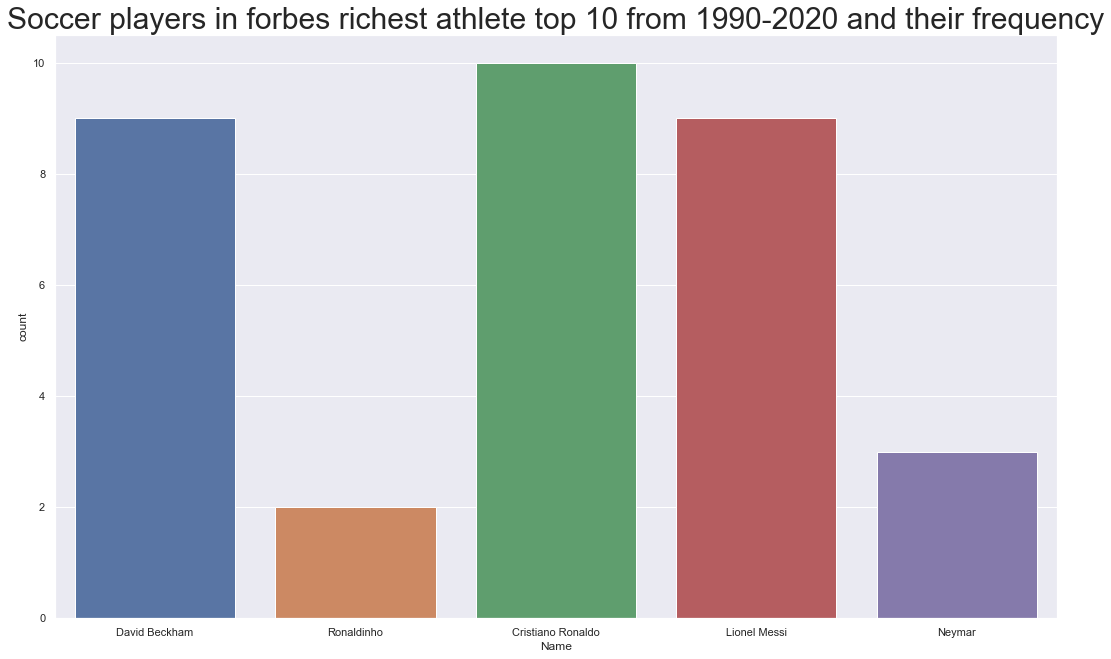

In [95]:
sns.set(rc={'figure.figsize':(16,10)})
plt.title ("Soccer players in forbes richest athlete top 10 from 1990-2020 and their frequency", fontsize=30)
sns.countplot('Name',data=soccer_list)

Text(0.5, 1.0, 'Forbes Richest Athletes and their various earnings')

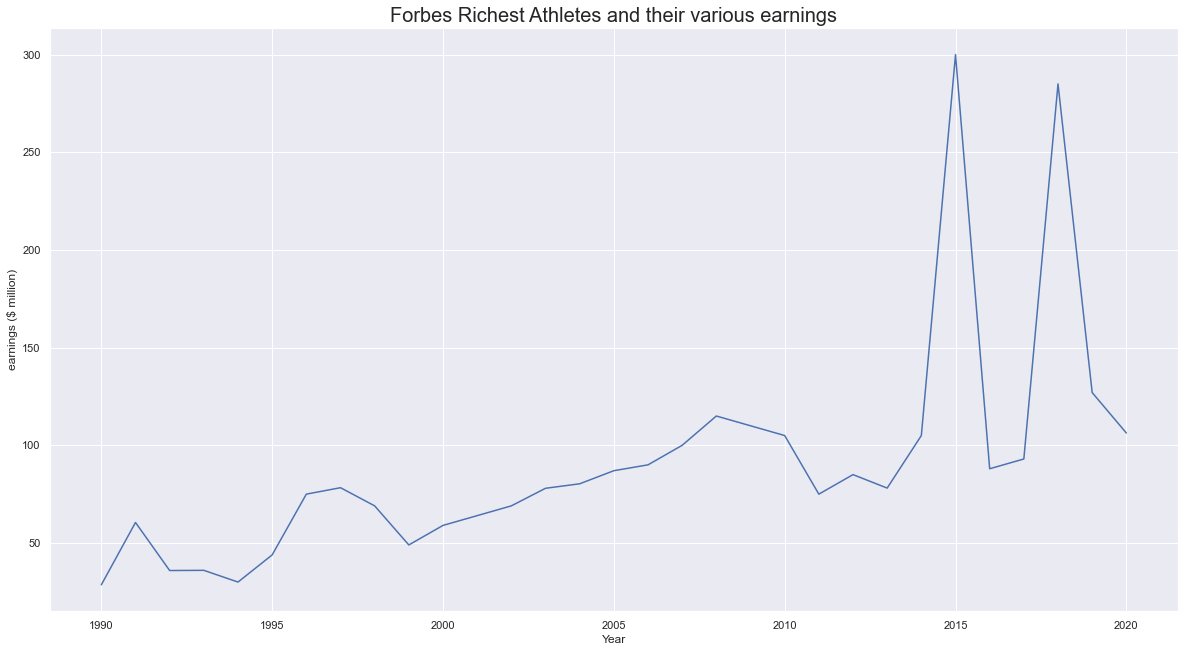

In [96]:
plt.figure(figsize=(18,10))
sns.lineplot(x = 'Year',y='earnings ($ million)',data = first_rank).set_title('Forbes Richest Athletes and their various earnings',fontsize = 20)